In [1]:
#IMPORTAMOS TODAS NUESTRAS LIBRERÍAS
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report
)
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier



In [2]:
#PERMISOS PARA ACCEDER A NUESTRO DRIVE Y BUSCAR LA RUTA DEL EXCEL DE LA BASE DE DATOS DE LOS ESTUDIANTES EN TU DRIVE
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#SU ÚNICA RESPONSABILIDAD DE ESTA FUNCIÓN ES LEER LA BASE DE DATOS ACADÉMICA EN EXCEL Y NOS RETORNA UN DATAFRAME DE PANDAS
def load_kdd_dataset(data_path):
  df=pd.read_excel(data_path, sheet_name='matriz', index_col=0)
  return df

In [4]:
# -----------------------------------------------------------------------------------------------------------------
# 1. INVOCAMOS A LA FUNCIÓN load_kdd_dataset Y LE INDICAMOS LA RUTA DONDE ESTÁ NUESTRO EXCEL DE LA BASE DE DATOS ACADÉMICA
# ----------------------------------------------------------------------------------------------------------------
df = load_kdd_dataset("/content/drive/Shareddrives/ARTÍCULOS/IEEE LATIN AMERICA TRANSACTIONS/ANÁLISIS DE INFORMACIÓN/BD de estudiantes.xlsx")
df

,Q1_cual_edad,Q2_cual_sexo,Q3_inge_cursas,Q4_semestre_actual,Q5_promedio_general,Q6_promedio_semestre,Q7_materias_no_aprobadas,Q8_satis_ense,Q9_satis_met_ense,Q10_comunicar_capaz_prof_compa,...,Q22_ansiedad_depresion_por_estudios,Q23_manejar_estres_relacionado_escuela,Q24_discriminado_excluido_escuela,Q25_apoyo_familiar_seguir_estudiando,Q26_motivado_terminar_carrera,Q27_orientacion_acade_psicol,Q28_tienes_control_propio_aprendi,Q29_buen_equilibrio_vida_escolar_persona,Q30_clases_interesantes_relevantes,Q31_educacion_contribuir_sostenible
ID,,,,,,,,,,,,,,,,,,,,,
1,más de 21 años,Hombre,Ingeniería en Informática,Cuarto semestre,8: Bien,8: Bien,Ninguna materia,Neutral,Satisfecho,Neutral,...,A menudo,Totalmente incapaz,Frecuentemente,Siempre,Muy motivado,En desacuerdo,Neutral,Neutral,En desacuerdo,En desacuerdo
2,19 años,Hombre,Ingeniería en Informática,Cuarto semestre,8: Bien,8: Bien,Ninguna materia,Neutral,Neutral,Neutral,...,Rara vez,Capaz,Nunca,Siempre,Algo Motivado,En desacuerdo,Neutral,De acuerdo,Totalmente de acuerdo,Neutral
3,19 años,Mujer,Ingeniería en Informática,Cuarto semestre,8: Bien,8: Bien,Ninguna materia,Satisfecho,Satisfecho,Capaz,...,A veces,Incapaz,Nunca,Rara vez,Muy motivado,Neutral,Neutral,En desacuerdo,De acuerdo,Totalmente de acuerdo
4,20 años,Hombre,Ingeniería en Informática,Cuarto semestre,9: Notable,8: Bien,Ninguna materia,Satisfecho,Satisfecho,Capaz,...,Nunca,Capaz,Nunca,Siempre,Muy motivado,Totalmente de acuerdo,Neutral,De acuerdo,De acuerdo,Neutral
5,21 años,Hombre,Ingeniería en Informática,Cuarto semestre,8: Bien,7:Aprobado,Ninguna materia,Satisfecho,Satisfecho,Totalmente capaz,...,A veces,Neutral,Nunca,Siempre,Muy motivado,Totalmente en desacuerdo,En desacuerdo,En desacuerdo,En desacuerdo,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,más de 21 años,Hombre,Ingeniería en Informática,Noveno semestre,8: Bien,8: Bien,2 Materias reprobadas,Satisfecho,Satisfecho,Capaz,...,A menudo,Incapaz,Nunca,Siempre,Algo Motivado,Neutral,Neutral,Neutral,Neutral,De acuerdo
427,21 años,Mujer,Ingeniería en Informática,Noveno semestre,9: Notable,8: Bien,Ninguna materia,Neutral,Satisfecho,Neutral,...,Nunca,Neutral,Nunca,Nunca,Neutral,En desacuerdo,Neutral,Neutral,Neutral,Neutral
428,21 años,Mujer,Ingeniería en Informática,Noveno semestre,8: Bien,7:Aprobado,Ninguna materia,Muy satisfecho,Satisfecho,Totalmente capaz,...,A veces,Neutral,Nunca,Siempre,Algo Motivado,De acuerdo,De acuerdo,Totalmente de acuerdo,De acuerdo,De acuerdo


In [5]:
# -------------------------------------------------------------------------------------------------------------------------------
# 2. CODIFICACIÓN DE DATOS CATEGORICOS A BINARIOS UTILIZANDO ONEHOTENCODER QUEDANDO UNA DATASET DE 430 INSTANCIAS X 148 ATRIBUTOS
# -------------------------------------------------------------------------------------------------------------------------------
encoder = OneHotEncoder(sparse_output=False)
encoded_array = encoder.fit_transform(df)
encoded_columns = encoder.get_feature_names_out(df.columns)
df_encoded = pd.DataFrame(encoded_array, columns=encoded_columns)
df_encoded

,Q1_cual_edad_ más de 21 años,Q1_cual_edad_18 años,Q1_cual_edad_19 años,Q1_cual_edad_20 años,Q1_cual_edad_21 años,Q1_cual_edad_Egresado de más de 21 años,"Q1_cual_edad_Sin egresar, con más de 21 años",Q2_cual_sexo_Hombre,Q2_cual_sexo_Mujer,Q2_cual_sexo_Otro,...,Q30_clases_interesantes_relevantes_De acuerdo,Q30_clases_interesantes_relevantes_En desacuerdo,Q30_clases_interesantes_relevantes_Neutral,Q30_clases_interesantes_relevantes_Totalmente de acuerdo,Q30_clases_interesantes_relevantes_Totalmente en desacuerdo,Q31_educacion_contribuir_sostenible_De acuerdo,Q31_educacion_contribuir_sostenible_En desacuerdo,Q31_educacion_contribuir_sostenible_Neutral,Q31_educacion_contribuir_sostenible_Totalmente de acuerdo,Q31_educacion_contribuir_sostenible_Totalmente en desacuerdo
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
426,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
427,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
428,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


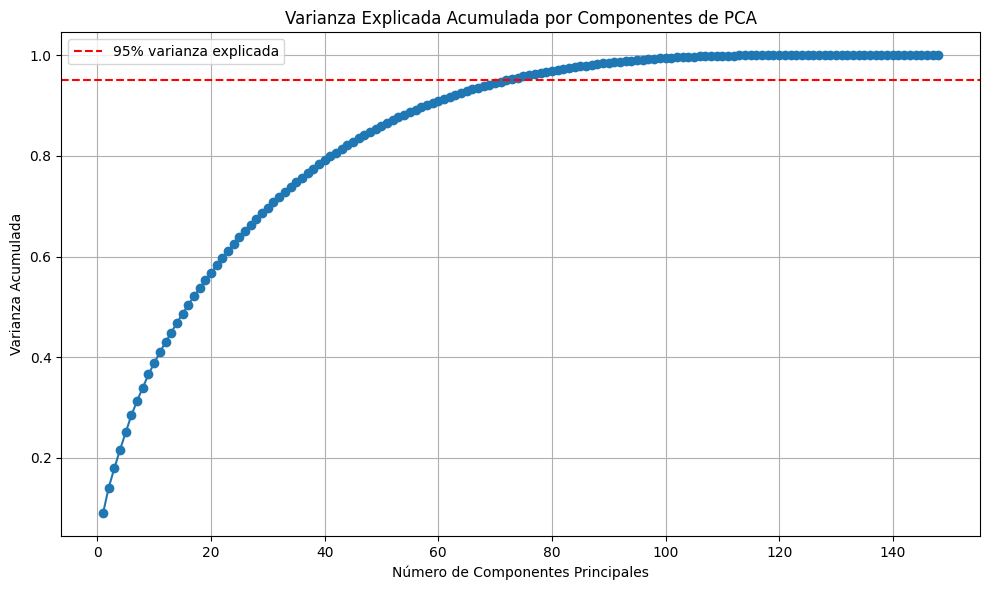

In [6]:
# -----------------------------------------------------------------------------------------------------------------
# 3. INVOCAMOS AL ALGORTIMO PCA PARA REALIZAR LA SELECCIÓN AUTOMÁTICA DE COMPONENTES. COMO SE MUESTRA EN LA CURVA CON 72 COMPONENTES SE ALCANZA EL 95% DE LA VARIANZA EXPLICADA.
# ----------------------------------------------------------------------------------------------------------------
pca_full = PCA()
pca_full.fit(df_encoded)
explained_variance = np.cumsum(pca_full.explained_variance_ratio_)
explained_variance


# SE GRAFICA LA VARIANZA ACUMULADA.
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(explained_variance)+1), explained_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% varianza explicada')
plt.title('Varianza Explicada Acumulada por Componentes de PCA')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulada')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [7]:
# Selección del número óptimo de componentes (95% varianza)
n_components_opt = np.argmax(explained_variance >= 0.95) + 1
pca = PCA(n_components=n_components_opt, random_state=42)
X_pca = pca.fit_transform(df_encoded)

In [8]:
n_components_opt

np.int64(72)

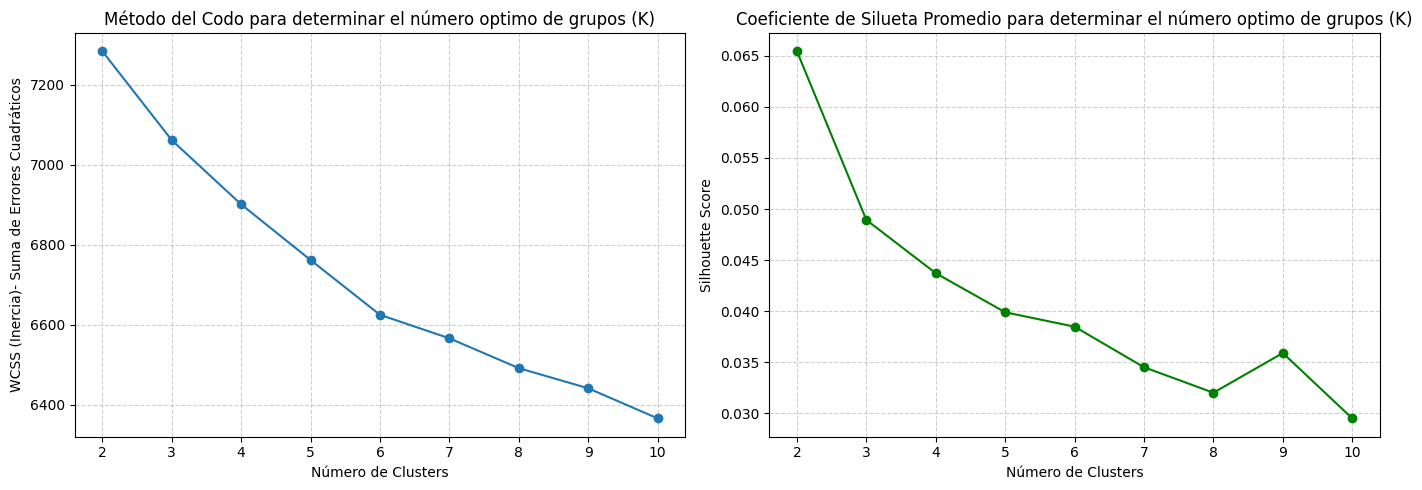

In [9]:
# 4. Método del Codo y Silueta para seleccionar número óptimo de clusters
wcss = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels_temp = kmeans_temp.fit_predict(X_pca)
    wcss.append(kmeans_temp.inertia_)
    silhouette_scores.append(silhouette_score(X_pca, labels_temp))

# Graficar los resultados
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Método del Codo
axes[0].plot(K_range, wcss, marker='o')
axes[0].set_title('Método del Codo para determinar el número optimo de grupos (K)')
axes[0].set_xlabel('Número de Clusters')
axes[0].set_ylabel('WCSS (Inercia)- Suma de Errores Cuadráticos')
axes[0].grid(visible=True, linestyle='--', alpha=0.6)

# Silueta Promedio
axes[1].plot(K_range, silhouette_scores, marker='o', color='green')
axes[1].set_title('Coeficiente de Silueta Promedio para determinar el número optimo de grupos (K)')
axes[1].set_xlabel('Número de Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(visible=True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


In [10]:
# 5. KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_pca)
centroids = kmeans.cluster_centers_

In [11]:
clusters

array([2, 1, 2, 0, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2,
       1, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 1,
       1, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 1, 1, 2, 0, 0, 2, 2,
       1, 1, 1, 1, 2, 2, 0, 1, 0, 0, 2, 0, 2, 1, 0, 1, 0, 2, 0, 0, 1, 1,
       0, 0, 2, 1, 0, 1, 2, 1, 0, 2, 1, 1, 0, 2, 1, 2, 2, 2, 0, 2, 1, 0,
       0, 0, 2, 2, 0, 1, 0, 2, 0, 1, 2, 0, 2, 1, 2, 0, 1, 2, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 1, 2, 2, 0, 1, 1, 1, 2, 2, 2,
       2, 0, 1, 1, 2, 1, 1, 1, 1, 2, 0, 2, 2, 2, 1, 1, 1, 2, 2, 1, 0, 1,
       2, 0, 2, 0, 0, 1, 2, 1, 0, 1, 0, 2, 1, 0, 1, 1, 0, 2, 1, 1, 1, 2,
       0, 0, 0, 1, 0, 1, 1, 2, 1, 1, 0, 0, 2, 1, 1, 1, 2, 2, 1, 2, 1, 0,
       1, 2, 0, 1, 1, 0, 1, 2, 2, 0, 2, 2, 1, 2, 1, 0, 2, 2, 1, 1, 2, 2,
       2, 1, 0, 1, 2, 1, 2, 1, 1, 2, 0, 0, 1, 1, 2, 0, 1, 1, 1, 2, 1, 1,
       0, 0, 0, 2, 0, 0, 0, 0, 1, 2, 0, 1, 1, 1, 0, 1, 1, 2, 0, 0, 0, 2,
       1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1,

In [ ]:
len(clusters)

430

In [13]:
# 6. Asignación de clusters al dataframe original
df_interpretacion = df.copy()
df_interpretacion['Cluster'] = clusters
df_encoded['Cluster'] = clusters
cluster_modes = df_interpretacion.groupby('Cluster').agg(lambda x: x.mode().iloc[0] if not x.mode().empty else 'N/A')
df_interpretacion

,Q1_cual_edad,Q2_cual_sexo,Q3_inge_cursas,Q4_semestre_actual,Q5_promedio_general,Q6_promedio_semestre,Q7_materias_no_aprobadas,Q8_satis_ense,Q9_satis_met_ense,Q10_comunicar_capaz_prof_compa,...,Q23_manejar_estres_relacionado_escuela,Q24_discriminado_excluido_escuela,Q25_apoyo_familiar_seguir_estudiando,Q26_motivado_terminar_carrera,Q27_orientacion_acade_psicol,Q28_tienes_control_propio_aprendi,Q29_buen_equilibrio_vida_escolar_persona,Q30_clases_interesantes_relevantes,Q31_educacion_contribuir_sostenible,Cluster
ID,,,,,,,,,,,,,,,,,,,,,
1,más de 21 años,Hombre,Ingeniería en Informática,Cuarto semestre,8: Bien,8: Bien,Ninguna materia,Neutral,Satisfecho,Neutral,...,Totalmente incapaz,Frecuentemente,Siempre,Muy motivado,En desacuerdo,Neutral,Neutral,En desacuerdo,En desacuerdo,2
2,19 años,Hombre,Ingeniería en Informática,Cuarto semestre,8: Bien,8: Bien,Ninguna materia,Neutral,Neutral,Neutral,...,Capaz,Nunca,Siempre,Algo Motivado,En desacuerdo,Neutral,De acuerdo,Totalmente de acuerdo,Neutral,1
3,19 años,Mujer,Ingeniería en Informática,Cuarto semestre,8: Bien,8: Bien,Ninguna materia,Satisfecho,Satisfecho,Capaz,...,Incapaz,Nunca,Rara vez,Muy motivado,Neutral,Neutral,En desacuerdo,De acuerdo,Totalmente de acuerdo,2
4,20 años,Hombre,Ingeniería en Informática,Cuarto semestre,9: Notable,8: Bien,Ninguna materia,Satisfecho,Satisfecho,Capaz,...,Capaz,Nunca,Siempre,Muy motivado,Totalmente de acuerdo,Neutral,De acuerdo,De acuerdo,Neutral,0
5,21 años,Hombre,Ingeniería en Informática,Cuarto semestre,8: Bien,7:Aprobado,Ninguna materia,Satisfecho,Satisfecho,Totalmente capaz,...,Neutral,Nunca,Siempre,Muy motivado,Totalmente en desacuerdo,En desacuerdo,En desacuerdo,En desacuerdo,Neutral,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,más de 21 años,Hombre,Ingeniería en Informática,Noveno semestre,8: Bien,8: Bien,2 Materias reprobadas,Satisfecho,Satisfecho,Capaz,...,Incapaz,Nunca,Siempre,Algo Motivado,Neutral,Neutral,Neutral,Neutral,De acuerdo,2
427,21 años,Mujer,Ingeniería en Informática,Noveno semestre,9: Notable,8: Bien,Ninguna materia,Neutral,Satisfecho,Neutral,...,Neutral,Nunca,Nunca,Neutral,En desacuerdo,Neutral,Neutral,Neutral,Neutral,1
428,21 años,Mujer,Ingeniería en Informática,Noveno semestre,8: Bien,7:Aprobado,Ninguna materia,Muy satisfecho,Satisfecho,Totalmente capaz,...,Neutral,Nunca,Siempre,Algo Motivado,De acuerdo,De acuerdo,Totalmente de acuerdo,De acuerdo,De acuerdo,2


In [14]:
cluster_modes

,Q1_cual_edad,Q2_cual_sexo,Q3_inge_cursas,Q4_semestre_actual,Q5_promedio_general,Q6_promedio_semestre,Q7_materias_no_aprobadas,Q8_satis_ense,Q9_satis_met_ense,Q10_comunicar_capaz_prof_compa,...,Q22_ansiedad_depresion_por_estudios,Q23_manejar_estres_relacionado_escuela,Q24_discriminado_excluido_escuela,Q25_apoyo_familiar_seguir_estudiando,Q26_motivado_terminar_carrera,Q27_orientacion_acade_psicol,Q28_tienes_control_propio_aprendi,Q29_buen_equilibrio_vida_escolar_persona,Q30_clases_interesantes_relevantes,Q31_educacion_contribuir_sostenible
Cluster,,,,,,,,,,,,,,,,,,,,,
0,más de 21 años,Hombre,Ingeniería en Civil,Cuarto semestre,8: Bien,8: Bien,Ninguna materia,Satisfecho,Satisfecho,Capaz,...,A veces,Neutral,Nunca,Siempre,Muy motivado,De acuerdo,De acuerdo,De acuerdo,De acuerdo,De acuerdo
1,más de 21 años,Hombre,Ingeniería en Civil,Cuarto semestre,8: Bien,8: Bien,Ninguna materia,Neutral,Neutral,Neutral,...,A veces,Neutral,Nunca,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral
2,20 años,Mujer,Ingeniería en Informática,Cuarto semestre,8: Bien,8: Bien,Ninguna materia,Satisfecho,Satisfecho,Capaz,...,A veces,Capaz,Nunca,Siempre,Muy motivado,De acuerdo,De acuerdo,De acuerdo,De acuerdo,De acuerdo


In [15]:
# 7. Validación de Clustering
calinski = calinski_harabasz_score(X_pca, clusters)
silhouette_avg = silhouette_score(X_pca, clusters)
print("Calinski-Harabasz Index:", calinski)
print("Silhouette Coefficient:", silhouette_avg)

Calinski-Harabasz Index: 23.10140959375186
Silhouette Coefficient: 0.04893194574602471


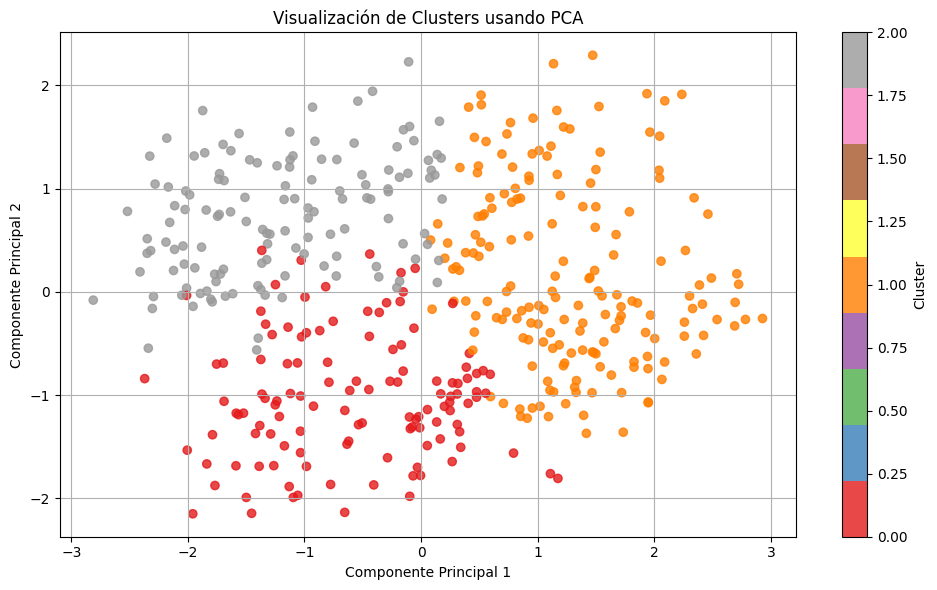

In [16]:
# Añadir los clusters al DataFrame reducido
df_clusters = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
df_clusters['Cluster'] = clusters

# Visualizar los dos primeros componentes
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_clusters['PC1'], df_clusters['PC2'], c=df_clusters['Cluster'], cmap='Set1', alpha=0.8)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Visualización de Clusters usando PCA')
plt.grid(True)
plt.colorbar(scatter, label='Cluster')
plt.tight_layout()
plt.show()

In [17]:
df_clusters

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC64,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72,Cluster
0,-0.280023,0.710253,-0.563507,-0.022410,-0.030937,-1.231001,0.116398,-0.603880,-0.426139,0.951429,...,-0.207547,-0.236161,0.035997,0.181361,-0.163319,0.093461,0.134349,0.102294,-0.167471,2
1,0.512134,0.480786,-1.209293,-0.273572,0.736071,-0.913480,-0.758862,2.070870,-0.844381,-0.050239,...,0.323153,-0.183922,-0.069454,0.175007,0.015579,-0.065196,-0.300740,0.061680,-0.081676,1
2,-1.166238,0.591263,-0.344315,1.161914,0.126566,0.123730,-0.606958,-0.334139,-1.421100,1.403704,...,-0.330644,0.073815,-0.052514,-0.256313,0.525130,0.171703,0.113172,-0.281680,-0.394098,2
3,-1.060075,-0.688167,-0.601611,-0.738185,-0.152246,0.225310,0.127940,0.966089,-1.178798,0.336557,...,0.055995,0.031528,0.133639,0.136118,0.020184,0.140710,0.059963,-0.033500,-0.032134,0
4,-1.073758,0.425237,-0.449431,-0.056622,0.248428,-0.550372,1.076024,-0.449115,-0.993609,0.560265,...,-0.178326,-0.627766,-0.382217,0.179722,0.504516,0.334979,0.011598,-0.450319,-0.511620,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,0.139502,0.091088,-1.466465,0.502103,-0.333108,-0.807847,0.893737,0.210681,-0.745217,0.913772,...,0.177805,-0.335190,-0.092251,-0.109240,0.451421,-0.087484,-0.016471,-0.231763,0.017221,2
426,0.768242,0.056743,-0.745438,-0.540528,0.432279,0.508911,-0.392714,-0.328849,-0.348941,-0.223519,...,-0.117025,0.253710,-0.225154,-0.588503,-0.141544,0.179007,-0.283771,0.092148,0.442145,1
427,-1.323331,0.568159,-0.689286,1.143681,-0.822708,-0.528069,-0.197209,0.002734,-1.278865,-1.003146,...,-0.119759,0.144256,-0.089717,-0.652862,0.170800,-0.382691,-0.410746,0.388250,-0.079558,2
428,0.483362,1.154305,0.067878,0.796840,-1.282504,-1.316329,-0.146443,-0.587402,0.166517,0.979365,...,0.199356,0.056880,-0.163785,0.055318,0.130127,-0.023426,-0.102146,0.145102,-0.413433,1


In [18]:
df_encoded

,Q1_cual_edad_ más de 21 años,Q1_cual_edad_18 años,Q1_cual_edad_19 años,Q1_cual_edad_20 años,Q1_cual_edad_21 años,Q1_cual_edad_Egresado de más de 21 años,"Q1_cual_edad_Sin egresar, con más de 21 años",Q2_cual_sexo_Hombre,Q2_cual_sexo_Mujer,Q2_cual_sexo_Otro,...,Q30_clases_interesantes_relevantes_En desacuerdo,Q30_clases_interesantes_relevantes_Neutral,Q30_clases_interesantes_relevantes_Totalmente de acuerdo,Q30_clases_interesantes_relevantes_Totalmente en desacuerdo,Q31_educacion_contribuir_sostenible_De acuerdo,Q31_educacion_contribuir_sostenible_En desacuerdo,Q31_educacion_contribuir_sostenible_Neutral,Q31_educacion_contribuir_sostenible_Totalmente de acuerdo,Q31_educacion_contribuir_sostenible_Totalmente en desacuerdo,Cluster
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2
426,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
427,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2
428,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1


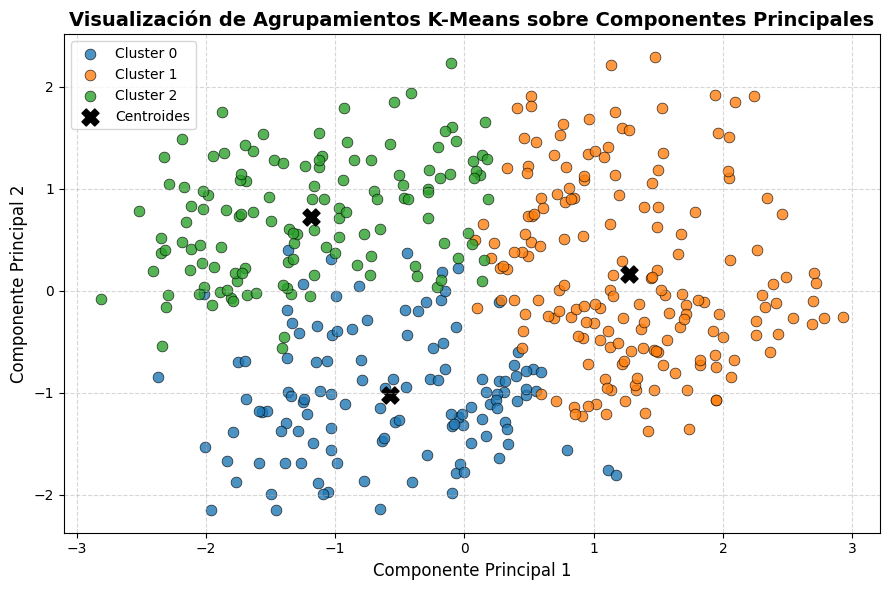

In [19]:
# 8. Visualización de Clusters (PC1 vs PC2)

plt.figure(figsize=(9, 6))

# Graficar los puntos agrupados
#scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='Set1', s=60, alpha=0.8, edgecolor='k', linewidth=0.5)
# Graficar cada cluster con etiqueta
for cluster_id in np.unique(clusters):
    plt.scatter(
        X_pca[clusters == cluster_id, 0],
        X_pca[clusters == cluster_id, 1],
        label=f"Cluster {cluster_id}",
        s=60, alpha=0.8, edgecolor='k', linewidth=0.5
    )

# Centroides
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=150, marker='X', label='Centroides')


# Añadir los centroides
#plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=150, marker='X', label='Centroides')

# Configuración del gráfico
plt.title("Visualización de Agrupamientos K-Means sobre Componentes Principales", fontsize=14, fontweight='bold')
plt.xlabel("Componente Principal 1", fontsize=12)
plt.ylabel("Componente Principal 2", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

plt.legend(loc='best')

plt.tight_layout()
plt.show()

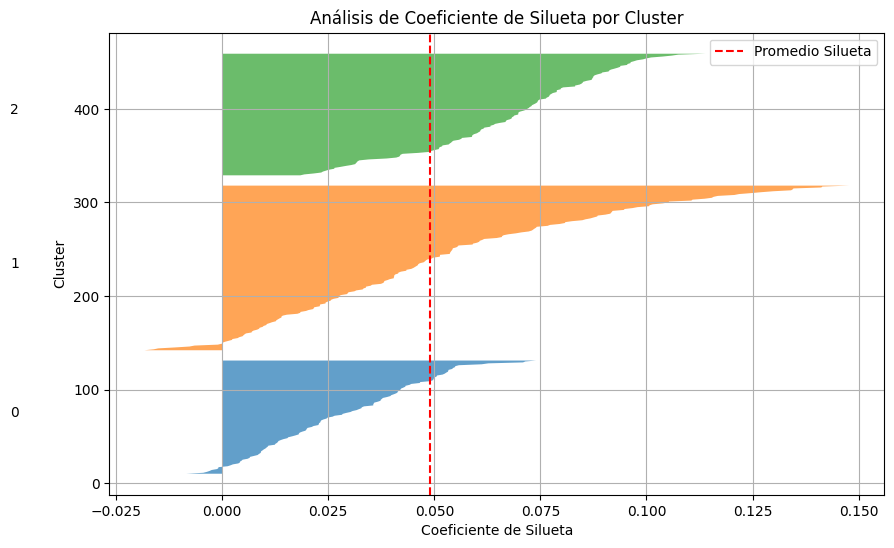

In [20]:
# 9. Silhouette Plot
silhouette_vals = silhouette_samples(X_pca, clusters)
plt.figure(figsize=(10, 6))
y_lower = 10
for i in range(3):
    cluster_vals = silhouette_vals[clusters == i]
    cluster_vals.sort()
    size_cluster_i = cluster_vals.shape[0]
    y_upper = y_lower + size_cluster_i
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_vals, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10
plt.axvline(silhouette_avg, color="red", linestyle="--", label="Promedio Silueta")
plt.xlabel("Coeficiente de Silueta")
plt.ylabel("Cluster")
plt.title("Análisis de Coeficiente de Silueta por Cluster")
plt.legend()
plt.grid(True)
plt.show()


In [21]:
# 9. Exportar a Excel
cluster_modes.to_excel("Resumen_Clusters_Estudiantes.xlsx", sheet_name="Resumen por Cluster")

In [22]:
df_interpretacion.to_excel("Resumen_Clusters_Estudiantes2.xlsx", sheet_name="Resumen por Cluster")

In [23]:
#Se inicia a aplicar algoritmos de aprendizaje supervisado. Se utiliza la base de datos reducida con 430 instancias y 73 columns, la última de ellas es la clase (los grupos)

#DIVIDE NUESTRA DATA EN 2 CONJUNTOS 80% PARA TRAINING, 20% PARA TEST
def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
    strat = df[stratify] if stratify else None
    train_set, test_set = train_test_split(
        df, test_size=0.2, random_state=rstate, shuffle=shuffle, stratify=strat)

    return (train_set, test_set)

In [24]:
#SEPARA LA CLASE DE LOS ATRIBUTOS
def remove_labels(df,label_name):
    X=df.drop(label_name,axis=1)
    y=df[label_name].copy()
    return (X,y)

In [25]:
train_set, test_set = train_val_test_split(df_clusters)

In [26]:
clases=["Cluster"]
X_train, y_train=remove_labels(train_set,clases)
y_train

,Cluster
66,1
132,0
407,1
31,1
84,0
...,...
71,2
106,0
270,0
348,2


In [27]:
clases=["Cluster"]
X_test, y_test=remove_labels(test_set,clases)
X_test

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72
422,1.466269,-0.977279,-0.686980,-0.158049,-0.596500,-0.421915,-0.025292,-0.127706,-0.933754,1.068685,...,0.125914,0.416269,0.092431,-0.002182,0.450787,0.120775,-0.250744,-0.031536,-0.157826,-0.077013
75,-0.287813,-1.606510,-0.938135,-0.930181,0.760391,0.279614,0.699926,-0.984271,0.086302,-0.528555,...,-0.207995,-0.250758,-0.025294,-0.320996,-0.191508,-0.116497,0.121979,-0.037469,0.020116,-0.271877
177,-0.611641,-0.955588,0.246208,-1.219408,-1.076471,0.132645,0.269184,-1.500443,-0.691822,-0.491408,...,0.197888,0.277143,0.484031,-0.197815,0.282866,0.264747,0.228572,0.297611,0.269463,0.247060
30,2.423103,-0.421860,-0.253380,-0.645219,0.809776,0.770247,0.735093,-0.232919,1.383214,-0.640989,...,0.295314,-0.068748,-0.037636,0.201710,-0.039233,0.112628,0.198652,-0.013720,0.115869,-0.211806
361,1.386527,-0.302323,-0.059060,-0.048875,-0.160817,-0.117900,-0.613171,-1.198005,-0.497308,-0.349396,...,-0.092772,0.075442,0.116645,0.466219,-0.012738,-0.338366,-0.057665,-0.137163,-0.018032,-0.059158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,0.823473,0.898808,-0.332702,1.345250,-0.810689,-1.033018,-0.686107,0.855931,0.249213,-2.006114,...,0.178327,-0.297574,-0.155919,-0.080585,0.138465,0.120003,0.324138,0.182771,0.033976,-0.339533
57,-1.499247,0.681790,0.633674,-1.479784,0.921953,-0.664653,0.598983,-0.906112,-0.380831,-1.064335,...,-0.074311,-0.469252,0.117462,-0.286307,0.048131,0.159178,0.131372,0.187000,-0.217108,0.051552
124,-1.174778,0.895486,0.431786,0.439739,0.157925,0.998787,0.796788,1.486683,-0.693553,-0.636008,...,-0.369872,0.024403,0.037335,-0.133623,0.062764,-0.167139,-0.214947,0.071142,0.149718,-0.229257
24,1.329422,-0.973732,0.282684,0.821848,-0.075506,0.158846,0.649410,0.358660,0.718444,-0.350368,...,-0.004960,-0.421352,-0.019970,-0.044180,-0.058734,0.391847,-0.355788,-0.194658,-0.253646,-0.271483


In [28]:
# Entrenamos un algoritmo basado en regresión logística
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=5000)
clf.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=5000)

In [29]:
y_pred = clf.predict(X_test)


MÉTRICAS GLOBALES (Promedios):
Accuracy: 0.9535
Precision (macro): 0.9587
Recall (macro): 0.9543
F1-score (macro): 0.9563
Precision (weighted): 0.9543
Recall (weighted): 0.9535
F1-score (weighted): 0.9536

Reporte por clase:
              precision    recall  f1-score   support

     Clase 0       0.93      0.97      0.95        29
     Clase 1       0.94      0.94      0.94        35
     Clase 2       1.00      0.95      0.98        22

    accuracy                           0.95        86
   macro avg       0.96      0.95      0.96        86
weighted avg       0.95      0.95      0.95        86



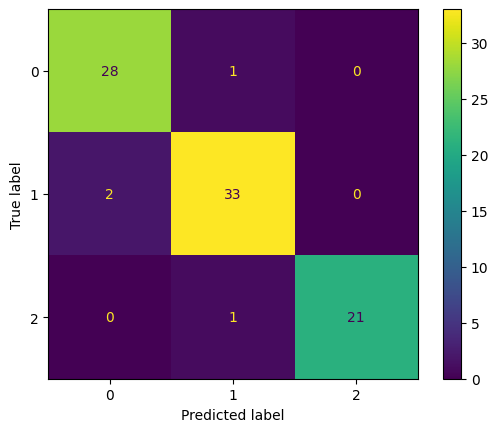

In [30]:

# -------------------------
# MATRIZ DE CONFUSIÓN
# -------------------------
cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2])
disp.plot()

# -------------------------
# MÉTRICAS MULTICLASE
# -------------------------
print("\nMÉTRICAS GLOBALES (Promedios):")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision (macro): {precision_score(y_test, y_pred, average='macro'):.4f}")
print(f"Recall (macro): {recall_score(y_test, y_pred, average='macro'):.4f}")
print(f"F1-score (macro): {f1_score(y_test, y_pred, average='macro'):.4f}")
print(f"Precision (weighted): {precision_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Recall (weighted): {recall_score(y_test, y_pred, average='weighted'):.4f}")
print(f"F1-score (weighted): {f1_score(y_test, y_pred, average='weighted'):.4f}")

# -------------------------
# 🧾 REPORTE DETALLADO POR CLASE
# -------------------------
print("\nReporte por clase:")
print(classification_report(y_test, y_pred, labels=[0, 1, 2], target_names=["Clase 0", "Clase 1", "Clase 2"]))



In [66]:
clases=["Cluster"]
X_datos, y_etiquetas=remove_labels(df_clusters,clases)
X_datos

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72
0,-0.280023,0.710253,-0.563507,-0.022410,-0.030937,-1.231001,0.116398,-0.603880,-0.426139,0.951429,...,0.061122,-0.207547,-0.236161,0.035997,0.181361,-0.163319,0.093461,0.134349,0.102294,-0.167471
1,0.512134,0.480786,-1.209293,-0.273572,0.736071,-0.913480,-0.758862,2.070870,-0.844381,-0.050239,...,0.090938,0.323153,-0.183922,-0.069454,0.175007,0.015579,-0.065196,-0.300740,0.061680,-0.081676
2,-1.166238,0.591263,-0.344315,1.161914,0.126566,0.123730,-0.606958,-0.334139,-1.421100,1.403704,...,0.036272,-0.330644,0.073815,-0.052514,-0.256313,0.525130,0.171703,0.113172,-0.281680,-0.394098
3,-1.060075,-0.688167,-0.601611,-0.738185,-0.152246,0.225310,0.127940,0.966089,-1.178798,0.336557,...,0.107606,0.055995,0.031528,0.133639,0.136118,0.020184,0.140710,0.059963,-0.033500,-0.032134
4,-1.073758,0.425237,-0.449431,-0.056622,0.248428,-0.550372,1.076024,-0.449115,-0.993609,0.560265,...,-0.002645,-0.178326,-0.627766,-0.382217,0.179722,0.504516,0.334979,0.011598,-0.450319,-0.511620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,0.139502,0.091088,-1.466465,0.502103,-0.333108,-0.807847,0.893737,0.210681,-0.745217,0.913772,...,0.443805,0.177805,-0.335190,-0.092251,-0.109240,0.451421,-0.087484,-0.016471,-0.231763,0.017221
426,0.768242,0.056743,-0.745438,-0.540528,0.432279,0.508911,-0.392714,-0.328849,-0.348941,-0.223519,...,0.221929,-0.117025,0.253710,-0.225154,-0.588503,-0.141544,0.179007,-0.283771,0.092148,0.442145
427,-1.323331,0.568159,-0.689286,1.143681,-0.822708,-0.528069,-0.197209,0.002734,-1.278865,-1.003146,...,0.013667,-0.119759,0.144256,-0.089717,-0.652862,0.170800,-0.382691,-0.410746,0.388250,-0.079558
428,0.483362,1.154305,0.067878,0.796840,-1.282504,-1.316329,-0.146443,-0.587402,0.166517,0.979365,...,-0.112905,0.199356,0.056880,-0.163785,0.055318,0.130127,-0.023426,-0.102146,0.145102,-0.413433


In [32]:
param_distribs={
    'n_estimators': randint(low=1, high=200),
    'max_depth': randint(low=8, high=50),
}

rnd_clf=RandomForestClassifier(n_jobs=-1)

rnd_search=RandomizedSearchCV(rnd_clf,param_distributions=param_distribs,n_iter=5,cv=2,scoring="f1_weighted")

rnd_search.fit(X_datos,y_etiquetas)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x788a8f4f4ad0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x788a8d455b50>},
                   scoring='f1_weighted')

In [33]:
rnd_search.best_params_

{'max_depth': 36, 'n_estimators': 186}

In [34]:
rnd_search.best_estimator_

RandomForestClassifier(max_depth=36, n_estimators=186, n_jobs=-1)

In [35]:
cvres=rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print("F1 Score:",mean_score, "-", "Parámetros:", params)

F1 Score: 0.9067133641106497 - Parámetros: {'max_depth': 39, 'n_estimators': 157}
F1 Score: 0.9141289226008518 - Parámetros: {'max_depth': 36, 'n_estimators': 186}
F1 Score: 0.8975764562040114 - Parámetros: {'max_depth': 29, 'n_estimators': 162}
F1 Score: 0.8927511040537055 - Parámetros: {'max_depth': 33, 'n_estimators': 62}
F1 Score: 0.9051731146218851 - Parámetros: {'max_depth': 30, 'n_estimators': 65}


In [ ]:
rnd_search.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 25,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 132,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [37]:
clf_rnd=rnd_search.best_estimator_

In [38]:
#IMPORTANCIA DE LAS CARACTERÍSTICAS
clf_rnd.feature_importances_

array([0.28112074, 0.14963351, 0.02226645, 0.01003233, 0.0085033 ,
       0.01182196, 0.01485265, 0.01133837, 0.00952491, 0.00958056,
       0.00732493, 0.00844355, 0.0085874 , 0.00824971, 0.00796942,
       0.00668587, 0.00723359, 0.01092856, 0.00611932, 0.00771107,
       0.00671736, 0.00873717, 0.00858081, 0.00908995, 0.00807554,
       0.00814768, 0.007014  , 0.00611841, 0.00614273, 0.00861152,
       0.00852277, 0.00812345, 0.00838572, 0.00822846, 0.00676579,
       0.00795907, 0.00872593, 0.00535475, 0.00655584, 0.00689995,
       0.00743597, 0.00815415, 0.00573421, 0.00644545, 0.00696642,
       0.00745567, 0.00683603, 0.00872639, 0.00715444, 0.00637024,
       0.00774691, 0.00858469, 0.00836329, 0.00591905, 0.0087451 ,
       0.00749656, 0.00731616, 0.00618911, 0.00852561, 0.00784929,
       0.00752269, 0.0056104 , 0.00932013, 0.00786938, 0.00892916,
       0.00636713, 0.00947824, 0.00846055, 0.00652345, 0.0070682 ,
       0.00787713, 0.00627368])

In [39]:
#EXTRAEMOS LAS CARACTERÍSTICAS MÁS IMPORTANTES PARA LA CORRECTA CLASIFICACIÓN DE LOS DATOS
feature_importances={name:score for name, score in zip(list(X_datos), clf_rnd.feature_importances_)}

In [40]:
#ORDENAMOS DE FORMA DESCENDENTE DE CADA UNO DE LOS ATRIBUTOS SELECCIONADOS Y TOMAMOS LAS 20 PRIMERAS
feature_importances_sorted=pd.Series(feature_importances).sort_values(ascending=False)
feature_importances_sorted.head(20)

,0
PC1,0.281121
PC2,0.149634
PC3,0.022266
PC7,0.014853
PC6,0.011822
PC8,0.011338
PC18,0.010929
PC4,0.010032
PC10,0.009581
PC9,0.009525


In [41]:
#TOMAMOS LAS 20 CARACTERISTICAS CON MÁS RELEVANCIA PARA ENTRENAR NUESTRO ALGORITMO
colums=list(feature_importances_sorted.head(20).index)
colums

['PC1',
 'PC2',
 'PC3',
 'PC7',
 'PC6',
 'PC8',
 'PC18',
 'PC4',
 'PC10',
 'PC9',
 'PC67',
 'PC63',
 'PC24',
 'PC65',
 'PC55',
 'PC22',
 'PC48',
 'PC37',
 'PC30',
 'PC13']

In [42]:
#SELECCIONAMOS SÓLO LAS CARACTERISTICAS ELEGIDAS POR RANDOMFOREST
df_reduced=X_datos[colums].copy()
df_reduced["Class"] = y_etiquetas

In [43]:
# Dividimos el conjunto de datos train_set=60%, val_set=20%, test_set=20%
train_set, test_set = train_val_test_split(df_reduced)

In [44]:
#REMOVEMOS LA ETIQUETA DE LOS ATRIBUTOS
X_train, y_train = remove_labels(train_set, 'Class')
X_test, y_test = remove_labels(test_set, 'Class')

In [45]:
#VOLVEMOS A ENTRENAR RANDOMFOREST, PERO AHORA CON LA DATA REDUCIDA POR EL MISMO
#clf_rnd=RandomForestClassifier(max_depth=13, n_estimators=156, n_jobs=-1)
clf_rnd.fit(X_train,y_train)

RandomForestClassifier(max_depth=36, n_estimators=186, n_jobs=-1)

In [46]:
y_pred = clf_rnd.predict(X_test)


MÉTRICAS GLOBALES (Promedios):
Accuracy: 0.9419
Precision (macro): 0.9459
Recall (macro): 0.9425
F1-score (macro): 0.9404
Precision (weighted): 0.9466
Recall (weighted): 0.9419
F1-score (weighted): 0.9403

Reporte por clase:
              precision    recall  f1-score   support

     Clase 0       1.00      0.83      0.91        29
     Clase 1       0.92      1.00      0.96        35
     Clase 2       0.92      1.00      0.96        22

    accuracy                           0.94        86
   macro avg       0.95      0.94      0.94        86
weighted avg       0.95      0.94      0.94        86



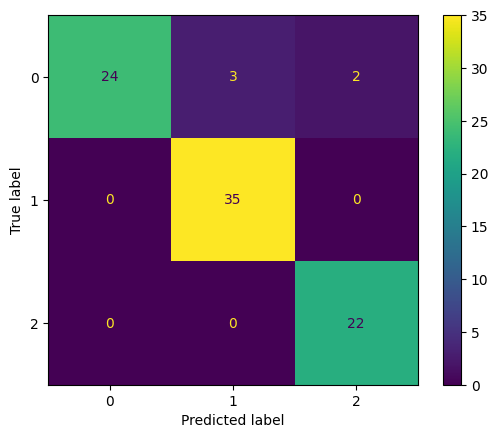

In [47]:
# -------------------------
# MATRIZ DE CONFUSIÓN
# -------------------------
cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2])
disp.plot()

# -------------------------
# MÉTRICAS MULTICLASE
# -------------------------
print("\nMÉTRICAS GLOBALES (Promedios):")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision (macro): {precision_score(y_test, y_pred, average='macro'):.4f}")
print(f"Recall (macro): {recall_score(y_test, y_pred, average='macro'):.4f}")
print(f"F1-score (macro): {f1_score(y_test, y_pred, average='macro'):.4f}")
print(f"Precision (weighted): {precision_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Recall (weighted): {recall_score(y_test, y_pred, average='weighted'):.4f}")
print(f"F1-score (weighted): {f1_score(y_test, y_pred, average='weighted'):.4f}")

# -------------------------
# REPORTE DETALLADO POR CLASE
# -------------------------
print("\nReporte por clase:")
print(classification_report(y_test, y_pred, labels=[0, 1, 2], target_names=["Clase 0", "Clase 1", "Clase 2"]))


In [48]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1, 10]
}

In [49]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')

In [50]:
train_set, test_set = train_val_test_split(df_clusters)

In [51]:
clases=["Cluster"]
X_train, y_train=remove_labels(train_set,clases)
y_train

,Cluster
66,1
132,0
407,1
31,1
84,0
...,...
71,2
106,0
270,0
348,2


In [52]:
clases=["Cluster"]
X_test, y_test=remove_labels(test_set,clases)
y_test

,Cluster
422,1
75,0
177,0
30,1
361,1
...,...
379,1
57,2
124,2
24,1


In [53]:
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto', 0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [54]:
best_svm_model = grid_search.best_estimator_

In [55]:
y_pred_svm = best_svm_model.predict(X_test)


MÉTRICAS GLOBALES (Promedios):
Accuracy: 0.9535
Precision (macro): 0.9658
Recall (macro): 0.9467
F1-score (macro): 0.9542
Precision (weighted): 0.9583
Recall (weighted): 0.9535
F1-score (weighted): 0.9538

Reporte por clase:
              precision    recall  f1-score   support

     Clase 0       1.00      0.93      0.96        29
     Clase 1       0.90      1.00      0.95        35
     Clase 2       1.00      0.91      0.95        22

    accuracy                           0.95        86
   macro avg       0.97      0.95      0.95        86
weighted avg       0.96      0.95      0.95        86



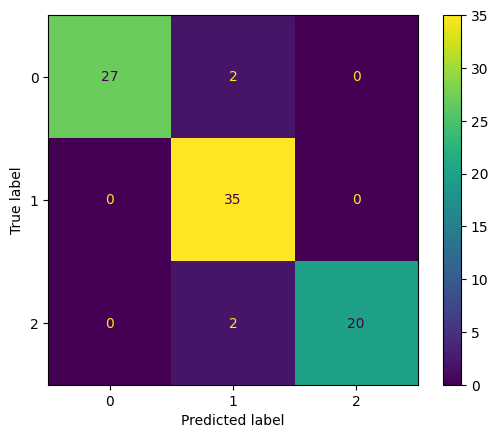

In [56]:
# -------------------------
# MATRIZ DE CONFUSIÓN
# -------------------------
cm = confusion_matrix(y_test, y_pred_svm, labels=[0, 1, 2])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2])
disp.plot()

# -------------------------
# MÉTRICAS MULTICLASE
# -------------------------
print("\nMÉTRICAS GLOBALES (Promedios):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"Precision (macro): {precision_score(y_test, y_pred_svm, average='macro'):.4f}")
print(f"Recall (macro): {recall_score(y_test, y_pred_svm, average='macro'):.4f}")
print(f"F1-score (macro): {f1_score(y_test, y_pred_svm, average='macro'):.4f}")
print(f"Precision (weighted): {precision_score(y_test, y_pred_svm, average='weighted'):.4f}")
print(f"Recall (weighted): {recall_score(y_test, y_pred_svm, average='weighted'):.4f}")
print(f"F1-score (weighted): {f1_score(y_test, y_pred_svm, average='weighted'):.4f}")

# -------------------------
# REPORTE DETALLADO POR CLASE
# -------------------------
print("\nReporte por clase:")
print(classification_report(y_test, y_pred_svm, labels=[0, 1, 2], target_names=["Clase 0", "Clase 1", "Clase 2"]))


In [57]:
param_distribs = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': randint(low=200, high=2000)
}

In [58]:
random_search = RandomizedSearchCV(MLPClassifier(), param_distribs, n_iter=10, cv=5, scoring='accuracy', random_state=42)

In [59]:
random_search.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed w

RandomizedSearchCV(cv=5, estimator=MLPClassifier(),
                   param_distributions={'activation': ['relu', 'tanh'],
                                        'alpha': [0.0001, 0.001, 0.01],
                                        'hidden_layer_sizes': [(50,), (100,),
                                                               (50, 50),
                                                               (100, 50)],
                                        'learning_rate': ['constant',
                                                          'adaptive'],
                                        'max_iter': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x788a8c0a9710>,
                                        'solver': ['adam', 'sgd']},
                   random_state=42, scoring='accuracy')

In [60]:
best_rna_model = random_search.best_estimator_

In [61]:
y_pred_rna = best_rna_model.predict(X_test)


MÉTRICAS GLOBALES (Promedios):
Accuracy: 0.9767
Precision (macro): 0.9790
Recall (macro): 0.9790
F1-score (macro): 0.9790
Precision (weighted): 0.9767
Recall (weighted): 0.9767
F1-score (weighted): 0.9767

Reporte por clase:
              precision    recall  f1-score   support

     Clase 0       0.97      0.97      0.97        29
     Clase 1       0.97      0.97      0.97        35
     Clase 2       1.00      1.00      1.00        22

    accuracy                           0.98        86
   macro avg       0.98      0.98      0.98        86
weighted avg       0.98      0.98      0.98        86



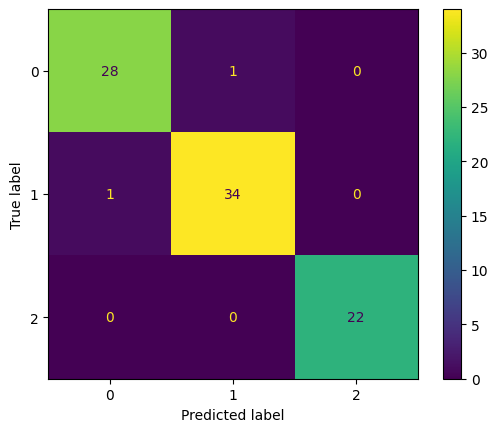

In [62]:
# -------------------------
# MATRIZ DE CONFUSIÓN
# -------------------------
cm = confusion_matrix(y_test, y_pred_rna, labels=[0, 1, 2])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2])
disp.plot()

# -------------------------
# MÉTRICAS MULTICLASE
# -------------------------
print("\nMÉTRICAS GLOBALES (Promedios):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rna):.4f}")
print(f"Precision (macro): {precision_score(y_test, y_pred_rna, average='macro'):.4f}")
print(f"Recall (macro): {recall_score(y_test, y_pred_rna, average='macro'):.4f}")
print(f"F1-score (macro): {f1_score(y_test, y_pred_rna, average='macro'):.4f}")
print(f"Precision (weighted): {precision_score(y_test, y_pred_rna, average='weighted'):.4f}")
print(f"Recall (weighted): {recall_score(y_test, y_pred_rna, average='weighted'):.4f}")
print(f"F1-score (weighted): {f1_score(y_test, y_pred_rna, average='weighted'):.4f}")

# -------------------------
# REPORTE DETALLADO POR CLASE
# -------------------------
print("\nReporte por clase:")
print(classification_report(y_test, y_pred_rna, labels=[0, 1, 2], target_names=["Clase 0", "Clase 1", "Clase 2"]))


In [63]:
#SE SELECCIONAN LAS CARACTERISTICAS MÁS RELEVANTES UTILIZANDO RANDOM FOREST
train_set, test_set = train_val_test_split(df_encoded)

In [64]:
clases=["Cluster"]
X_train, y_train=remove_labels(train_set,clases)
y_train

,Cluster
66,1
132,0
407,1
31,1
84,0
...,...
71,2
106,0
270,0
348,2


In [65]:
clases=["Cluster"]
X_test, y_test=remove_labels(test_set,clases)
y_test

,Cluster
422,1
75,0
177,0
30,1
361,1
...,...
379,1
57,2
124,2
24,1


In [67]:
clases=["Cluster"]
X_datos, y_etiquetas=remove_labels(df_encoded,clases)
X_datos

,Q1_cual_edad_ más de 21 años,Q1_cual_edad_18 años,Q1_cual_edad_19 años,Q1_cual_edad_20 años,Q1_cual_edad_21 años,Q1_cual_edad_Egresado de más de 21 años,"Q1_cual_edad_Sin egresar, con más de 21 años",Q2_cual_sexo_Hombre,Q2_cual_sexo_Mujer,Q2_cual_sexo_Otro,...,Q30_clases_interesantes_relevantes_De acuerdo,Q30_clases_interesantes_relevantes_En desacuerdo,Q30_clases_interesantes_relevantes_Neutral,Q30_clases_interesantes_relevantes_Totalmente de acuerdo,Q30_clases_interesantes_relevantes_Totalmente en desacuerdo,Q31_educacion_contribuir_sostenible_De acuerdo,Q31_educacion_contribuir_sostenible_En desacuerdo,Q31_educacion_contribuir_sostenible_Neutral,Q31_educacion_contribuir_sostenible_Totalmente de acuerdo,Q31_educacion_contribuir_sostenible_Totalmente en desacuerdo
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
426,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
427,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
428,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [68]:
param_distribs={
    'n_estimators': randint(low=1, high=200),
    'max_depth': randint(low=8, high=50),
}

rnd_clf=RandomForestClassifier(n_jobs=-1)

rnd_search=RandomizedSearchCV(rnd_clf,param_distributions=param_distribs,n_iter=5,cv=2,scoring="f1_weighted")

rnd_search.fit(X_datos,y_etiquetas)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x788a8c0b3d90>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x788a8579a910>},
                   scoring='f1_weighted')

In [69]:
rnd_search.best_params_

{'max_depth': 10, 'n_estimators': 151}

In [70]:
rnd_search.best_estimator_

RandomForestClassifier(max_depth=10, n_estimators=151, n_jobs=-1)

In [71]:
cvres=rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print("F1 Score:",mean_score, "-", "Parámetros:", params)

F1 Score: 0.9420609666959744 - Parámetros: {'max_depth': 47, 'n_estimators': 83}
F1 Score: 0.8953829880277269 - Parámetros: {'max_depth': 42, 'n_estimators': 13}
F1 Score: 0.817806960416573 - Parámetros: {'max_depth': 22, 'n_estimators': 4}
F1 Score: 0.937217838685862 - Parámetros: {'max_depth': 22, 'n_estimators': 80}
F1 Score: 0.9490078133245505 - Parámetros: {'max_depth': 10, 'n_estimators': 151}


In [72]:
rnd_search.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 151,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [73]:
clf_rnd=rnd_search.best_estimator_

In [74]:
#IMPORTANCIA DE LAS CARACTERÍSTICAS
clf_rnd.feature_importances_

array([4.29842151e-03, 1.63028456e-03, 1.78763687e-03, 1.99834388e-03,
       3.58223863e-03, 1.49145427e-03, 1.06536641e-03, 3.08066434e-03,
       4.33288677e-03, 8.02547933e-05, 4.23458891e-03, 2.30273187e-03,
       3.81131452e-03, 2.51613619e-03, 9.28843272e-04, 8.09841625e-04,
       2.69727101e-03, 2.07654211e-04, 2.61291304e-03, 2.25043542e-03,
       1.64227930e-03, 5.57381739e-04, 7.69849392e-05, 4.20590854e-04,
       1.60620698e-03, 2.12768550e-03, 4.37788319e-03, 4.57972794e-03,
       6.75999244e-05, 7.15913347e-04, 1.37265543e-03, 2.72162568e-03,
       3.23369968e-03, 3.21747079e-03, 2.81286981e-03, 1.71612263e-03,
       1.36238336e-03, 7.49973168e-04, 3.92222138e-03, 1.70920650e-03,
       1.13635123e-03, 2.30378356e-03, 4.77144033e-02, 2.39615545e-02,
       2.66573581e-03, 4.00388146e-04, 2.04177958e-03, 3.94507115e-02,
       2.94995729e-02, 6.98837396e-03, 3.07575369e-03, 9.79939609e-03,
       2.56727401e-03, 4.88449558e-04, 2.92914979e-03, 3.21985676e-03,
      

In [75]:
#EXTRAEMOS LAS CARACTERÍSTICAS MÁS IMPORTANTES PARA LA CORRECTA CLASIFICACIÓN DE LOS DATOS
feature_importances={name:score for name, score in zip(list(X_datos), clf_rnd.feature_importances_)}

In [76]:
#ORDENAMOS DE FORMA DESCENDENTE DE CADA UNO DE LOS ATRIBUTOS SELECCIONADOS Y TOMAMOS LAS 20 PRIMERAS
feature_importances_sorted=pd.Series(feature_importances).sort_values(ascending=False)
feature_importances_sorted.head(20)

,0
Q19_trabajas_estudias_Sí,0.096275
Q19_trabajas_estudias_No,0.092033
Q20_horas_laborables_semanal_No trabajo,0.071607
Q8_satis_ense_Neutral,0.047714
Q9_satis_met_ense_Neutral,0.039451
Q30_clases_interesantes_relevantes_Neutral,0.031837
Q9_satis_met_ense_Satisfecho,0.029500
"Q12_abandonar_estudios_No, nunca",0.028086
Q26_motivado_terminar_carrera_Muy motivado,0.026355
Q8_satis_ense_Satisfecho,0.023962
